<a href="https://colab.research.google.com/github/thedarkscepter/sturdy-funicular/blob/main/117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
import pandas as pd
df = pd.read_csv('data.csv')
print(df.head())

In [6]:
from sklearn.model_selection import train_test_split
age = df['age']
heart_attack = df['target']
age_train, age_test, heart_attack_train, heart_attack_test = train_test_split(age, heart_attack, test_size = 0.25, random_state = 0)

In [9]:
from sklearn.linear_model import LogisticRegression
import numpy as np
X = np.reshape(age_train.ravel(), (len(age_train), 1))
Y = np.reshape(heart_attack_train.ravel(), (len(heart_attack_train), 1))
classifier = LogisticRegression(random_state = 0)
classifier.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
X_test = np.reshape(age_train.ravel(), (len(age_train), 1))
Y_test = np.reshape(heart_attack_train.ravel(), (len(heart_attack_train), 1))
heart_attack_prediction = classifier.predict(X_test)
predicted_values = []
for i in heart_attack_prediction:
  if i == 0:
    predicted_values.append('No')
  else:
    predicted_values.append('Yes')
actual_values = []
for i in Y_test.ravel():
  if i == 0:
    actual_values.append('No')
  else:
    actual_values.append('Yes')
    

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

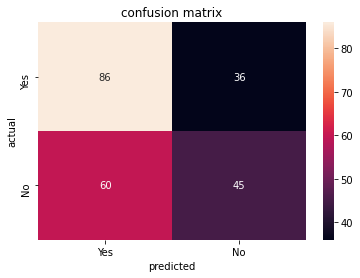

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
labels = ['Yes', 'No']
cm = confusion_matrix(actual_values, predicted_values, labels)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel('predicted')
ax.set_ylabel('actual')
ax.set_title('confusion matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [23]:
accuracy = 36+16/36+16+17+7
accuracy = 52/76
print(accuracy)

0.6842105263157895
